In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
IMAGE_SIZE = 224
def redimensionarImagenes(rutaDeArchivos):
    listaDeImagenes = []
    tf.reset_default_graph()
    imagenOriginal = tf.placeholder(tf.float32, (None, None, None))
    tf_img = tf.image.resize_images(imagenOriginal, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # Each image is resized individually as different image may be of different size.
        
        for contador, rutaDeImagen in enumerate(rutaDeArchivos):
            print("Imagen # "+str(contador+1)+"/"+str(len(rutaDeArchivos))+" : "+str(rutaDeImagen))
            imagenDeEntrada = mpimg.imread(rutaDeImagen)[:, :, :3] # Do not read alpha channel.
            imagenConNuevoTamano = sess.run(tf_img, feed_dict = {imagenOriginal: imagenDeEntrada})
            imagenReparada= np.multiply(imagenConNuevoTamano, 1.0 / 255.0)
            listaDeImagenes.append(imagenReparada)
    listaDeImagenes = np.array(listaDeImagenes, dtype = np.float32) # Convert to numpy
    return listaDeImagenes

# Obtener imagenes
X_imgs = redimensionarImagenes(['/notebooks/imagenes/ropa/blusa1.jpg','/notebooks/imagenes/ropa/blusa2.jpg','/notebooks/imagenes/ropa/blusa3.jpg'])

Imagen # 1/3 : /notebooks/imagenes/ropa/blusa1.jpg
Imagen # 2/3 : /notebooks/imagenes/ropa/blusa2.jpg
Imagen # 3/3 : /notebooks/imagenes/ropa/blusa3.jpg


In [2]:
def escalarImagenes(listaDeImagenes, listaDeEscalas):
    # Various settings needed for Tensorflow operation
    
    recuadros = np.zeros((len(listaDeEscalas), 4), dtype = np.float32)
    for contador, escala in enumerate(listaDeEscalas):
        x1 = y1 = 0.5 - 0.5 * escala # To scale centrally
        x2 = y2 = 0.5 + 0.5 * escala
        recuadros[contador] = np.array([y1, x1, y2, x2], dtype = np.float32)
        print("recuadros[contador] "+str(recuadros[contador]))
    
    numeroDeRecuadros = np.zeros((len(listaDeEscalas)), dtype = np.int32)
    tamanoDelRecorte = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    listaDeResultados = []
    tf.reset_default_graph()
    imagenDeEntrada = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    operacionDeRecorteYredimensionamiento = tf.image.crop_and_resize(imagenDeEntrada, recuadros, numeroDeRecuadros, tamanoDelRecorte)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for imagen in listaDeImagenes:
            # np.expand_dims, expande las dimensiones de una matriz
            loteDeImagen = np.expand_dims(imagen, axis = 0)
            imagenesEscaladas = sess.run(operacionDeRecorteYredimensionamiento, feed_dict = {imagenDeEntrada: loteDeImagen})
            listaDeResultados.extend(imagenesEscaladas)
            
    listaDeResultados = np.array(listaDeResultados, dtype = np.float32)
    return listaDeResultados
	
# Produce each image at scaling of 90%, 75%, 60% and 50% of original image.
imagenesEscaladas = escalarImagenes(X_imgs, [0.90, 0.75, 0.60, 0.50])

recuadros[contador] [0.05 0.05 0.95 0.95]
recuadros[contador] [0.125 0.125 0.875 0.875]
recuadros[contador] [0.2 0.2 0.8 0.8]
recuadros[contador] [0.25 0.25 0.75 0.75]


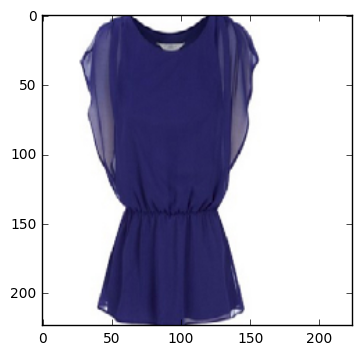

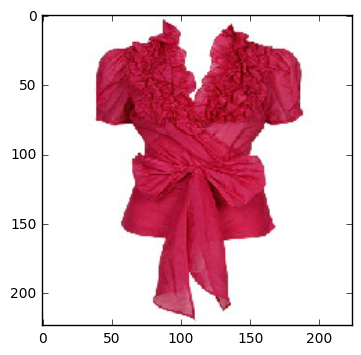

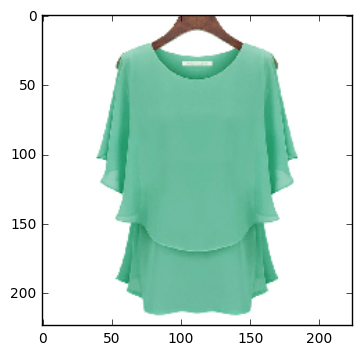

<type 'numpy.ndarray'>


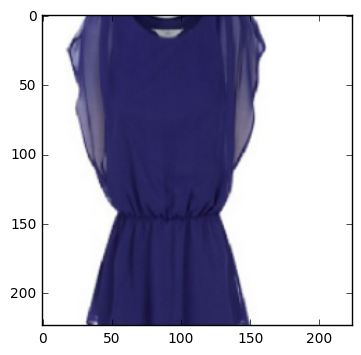

<type 'numpy.ndarray'>


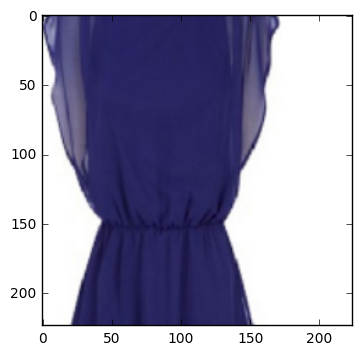

<type 'numpy.ndarray'>


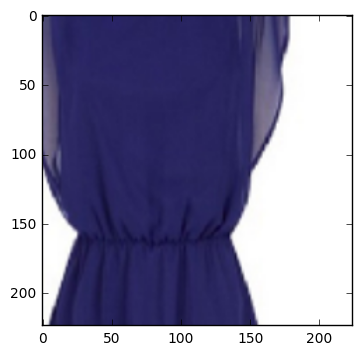

<type 'numpy.ndarray'>


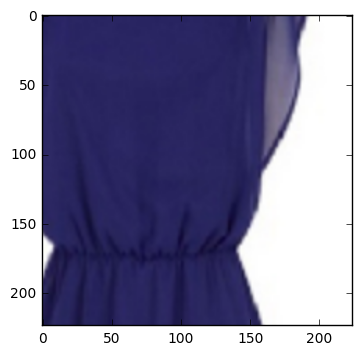

<type 'numpy.ndarray'>


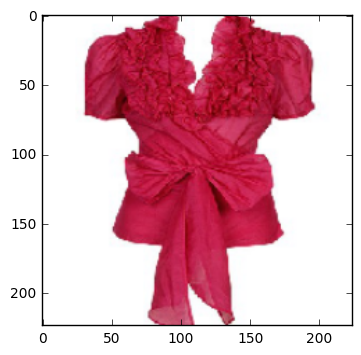

<type 'numpy.ndarray'>


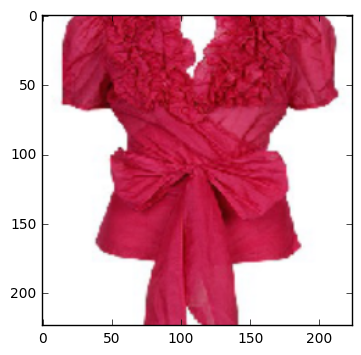

<type 'numpy.ndarray'>


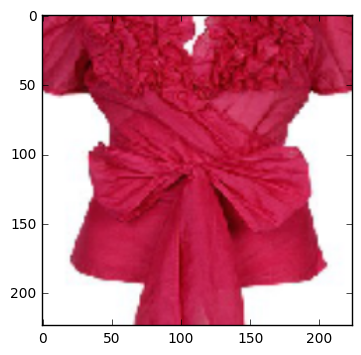

<type 'numpy.ndarray'>


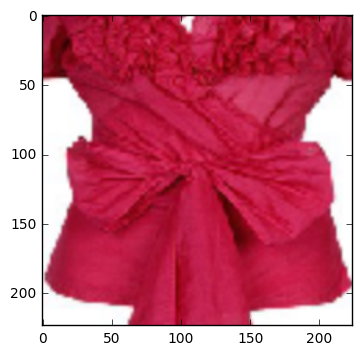

<type 'numpy.ndarray'>


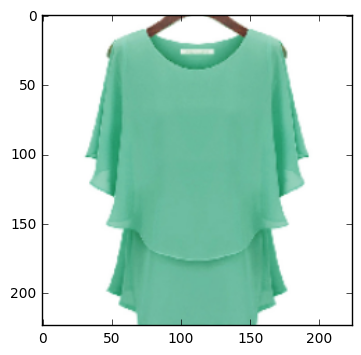

<type 'numpy.ndarray'>


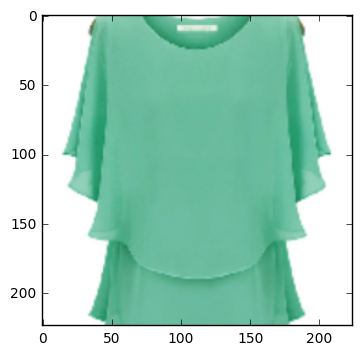

<type 'numpy.ndarray'>


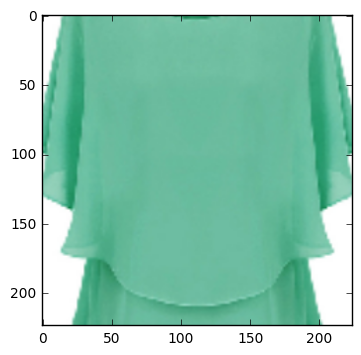

<type 'numpy.ndarray'>


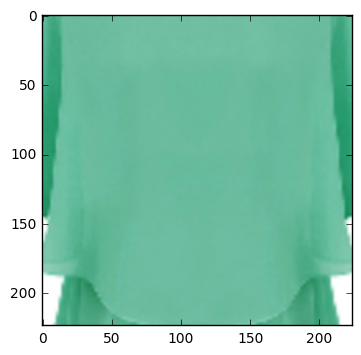

In [3]:
# Mostrar imagenes

for imagen in X_imgs:
    imgplot = plt.imshow(imagen)
    plt.show()
    
for image in imagenesEscaladas:    
    print type(image)
    plt.imshow(image)
    plt.show()